In [182]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [183]:
dados = pd.read_table("pes2013A.txt", sep=" ")

In [254]:
cursosQueFrequenta = dados[(dados.V6003<=5)|(dados.V6003==10)|(dados.V6003 ==11)]

AttributeError: 'DataFrame' object has no attribute 'V6003'

In [185]:
dados.V6003 = dados.V6003.astype('category')
dados.V6003.cat.categories = ('Regular do ensino fundamental','Regular do ensino médio', 'Supletivo do ensino fundamental', 'Supletivo do ensino médio', 'Graduacao', 'Alfabetização de jovens e adultos', 'Creche', 'Classe de alfabetização', 'Maternal', 'Pré-Vestibular', 'Mestrado ou doutorado')
dados.rename(columns={"V6003":"EDUCAÇÃO"}, inplace=True)

In [186]:
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('Rondonia', 'Acre', 'Amazonas', 'Roraima', 'Para','Amapa','Tocantins','Maranhao','Piaui','Ceara','Rio Grande do Norte','Paraiba','Pernanbuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de Janeiro','Sao Paulo','Parana','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goias','Distrito Federal')

In [187]:
tab1 = pd.crosstab(dados.EDUCAÇÃO, dados.UF)
tab1

# Tabela do número de pessoas de acordo com seu nível de escolaridade e o estado em que reside

UF,Rondonia,Acre,Amazonas,Roraima,Para,Amapa,Tocantins,Maranhao,Piaui,Ceara,...,Espirito Santo,Rio de Janeiro,Sao Paulo,Parana,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goias,Distrito Federal
EDUCAÇÃO,,,,,,,,,,,,,,,,,,,,,
Regular do ensino fundamental,1242,948,2722,487,4313,594,1176,1903,1038,3072,...,972,3487,5089,2565,1253,3609,918,1012,2155,1423
Regular do ensino médio,331,203,693,139,1140,156,393,543,260,894,...,260,1055,1695,784,412,1044,226,377,687,395
Supletivo do ensino fundamental,43,65,96,19,161,17,32,51,32,89,...,15,52,59,66,19,59,28,34,35,30
Supletivo do ensino médio,41,38,42,9,64,7,7,8,15,48,...,12,43,77,73,24,65,20,31,19,42
Graduacao,221,162,547,128,586,144,223,195,182,635,...,248,791,1387,750,459,1052,278,306,606,642
Alfabetização de jovens e adultos,5,11,11,2,12,6,2,33,18,37,...,4,19,15,23,7,21,5,7,8,6
Creche,67,56,123,48,296,35,82,190,120,356,...,149,451,932,448,246,523,124,120,177,160
Classe de alfabetização,19,26,80,16,51,13,33,22,8,34,...,23,167,63,29,11,28,24,33,35,22
Maternal,101,84,271,47,501,48,93,264,125,414,...,101,395,614,230,141,323,88,109,247,172


In [188]:
cursosQueFrequenta.UF = cursosQueFrequenta.UF.astype('category')
cursosQueFrequenta.UF.cat.categories = ('Rondonia', 'Acre', 'Amazonas', 'Roraima', 'Para','Amapa','Tocantins','Maranhao','Piaui','Ceara','Rio Grande do Norte','Paraiba','Pernanbuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de Janeiro','Sao Paulo','Parana','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goias','Distrito Federal')

/Users/NicolasFonteyne/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


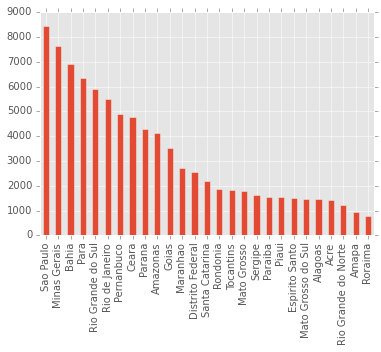

In [189]:
nEstudantesEstado = pd.DataFrame.plot(kind='bar', data=cursosQueFrequenta.UF.value_counts(),  legend=False)
nEstudantesEstado

In [190]:
dados.rename(columns={"V4750":"RENDA_FAMILIAR_PC"}, inplace=True)

In [191]:
dados.RENDA_FAMILIAR_PC = dados[dados.RENDA_FAMILIAR_PC != 999999999999].RENDA_FAMILIAR_PC

In [227]:
rendaMaxima = int(max(dados.RENDA_FAMILIAR_PC))
rendaMinima = int(min(dados.RENDA_FAMILIAR_PC))

In [237]:
bins = list(range(rendaMinima,rendaMaxima+1,500))

In [238]:
colunaRenda = pd.cut(dados.RENDA_FAMILIAR_PC, bins, include_lowest=True)

In [239]:
tab2 = pd.crosstab(colunaRenda,dados.UF)
tab2

# Tabela do número de pessoas de acordo com sua RENDA FAMILIAR PER CAPITA e o estado que reside

UF,Rondonia,Acre,Amazonas,Roraima,Para,Amapa,Tocantins,Maranhao,Piaui,Ceara,...,Espirito Santo,Rio de Janeiro,Sao Paulo,Parana,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goias,Distrito Federal
RENDA_FAMILIAR_PC,,,,,,,,,,,,,,,,,,,,,
"[0, 500]",3416,2799,7913,1522,13601,1575,3536,6274,3743,11553,...,2675,8530,10259,5193,1979,7513,2145,2633,5299,2439
"(500, 1000]",2087,1033,2937,696,4916,634,1660,1828,1184,4512,...,2189,7705,12918,6591,3415,9028,2152,2252,4921,2257
"(1000, 1500]",798,236,940,191,1325,201,480,422,302,1089,...,809,3109,5692,3112,1867,4316,846,804,1837,1069
"(1500, 2000]",248,110,465,120,641,105,241,152,131,410,...,310,1338,2619,1225,777,1885,356,409,765,622
"(2000, 2500]",114,70,182,32,255,64,104,56,55,171,...,194,723,1295,668,357,944,170,258,372,444
"(2500, 3000]",86,33,123,30,133,31,88,46,44,136,...,107,500,898,449,243,628,142,80,265,317
"(3000, 3500]",29,15,79,17,106,35,44,24,19,95,...,62,377,542,256,145,344,81,75,145,229
"(3500, 4000]",23,24,50,19,64,19,35,15,16,61,...,46,259,451,163,101,328,50,62,108,206
"(4000, 4500]",10,9,49,8,42,4,21,7,13,58,...,23,186,236,127,59,180,31,42,60,121


In [209]:
estados = ['Rondonia', 'Acre', 'Amazonas', 'Roraima', 'Para','Amapa','Tocantins','Maranhao','Piaui','Ceara','Rio Grande do Norte','Paraiba','Pernanbuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de Janeiro','Sao Paulo','Parana','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goias','Distrito Federal']

In [198]:
valores = []

for e in estados:
        
        media = (cursosQueFrequenta[(cursosQueFrequenta.UF == e) & (cursosQueFrequenta.V4750 != 999999999999)].V4750.sum())/(cursosQueFrequenta[(cursosQueFrequenta.UF == e) & (cursosQueFrequenta.V4750 != 999999999999)].shape[0])
        valores.append(media)

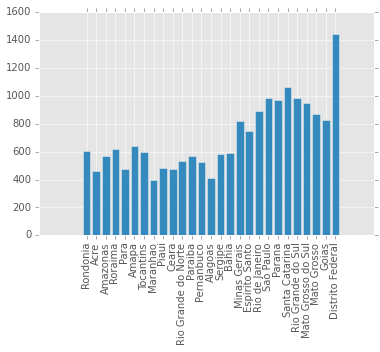

In [199]:
plt.bar(list(range(len(estados))),valores, align = 'center')
plt.xticks(list(range(len(estados))), estados, rotation = 'vertical')
plt.show()


In [272]:
estadosERendaMedia = {}

for i in range(len(estados)):
    
    estadosERendaMedia[estados[i]] = valores[i]

In [275]:
# pessoas*renda

lista = []

for e in list(cursosQueFrequenta.axes[0]):
    
    estado = str(cursosQueFrequenta.UF[e])
    
    pessoas = cursosQueFrequenta.UF.value_counts()[estado]
    renda = estadosERendaMedia[estado]
    
    pessoasXrenda = round(pessoas*renda/100000,1)
    
    lista.append(pessoasXrenda)

In [280]:
cursosQueFrequenta["RENDAxIDADE"] = lista

/Users/NicolasFonteyne/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [285]:
valores2 = []

for e in estados:

    pessoas = cursosQueFrequenta.UF.value_counts()[e]
    renda = estadosERendaMedia[e]
    
    pessoasXrenda = round(pessoas*renda/100000,1)
    
    valores2.append(pessoasXrenda)

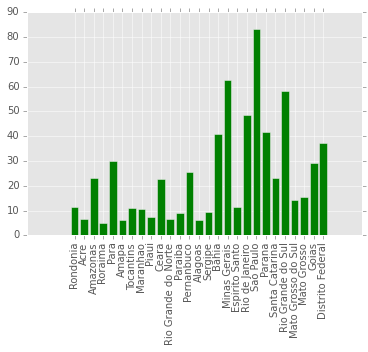

In [291]:
plt.bar(list(range(len(estados))),valores2, align = 'center', color = 'green')
plt.xticks(list(range(len(estados))), estados, rotation = 'vertical')
plt.show()

In [281]:
universitarios = dados[(dados.EDUCAÇÃO == 'Graduacao')]
universitarios.V0302 = universitarios.V0302.astype('category')
universitarios.V0302.cat.categories = ('Masculino','Feminino')

/Users/NicolasFonteyne/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [282]:
universitarios.loc[(universitarios.V0404 == 6)|(universitarios.V0404 == 0), 'V0404'] = 6
universitarios.V0404 = universitarios.V0404.astype('category')
universitarios.V0404.cat.categories = ('Branca','Preta','Indigena e Amarela','Parda')

/Users/NicolasFonteyne/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/NicolasFonteyne/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


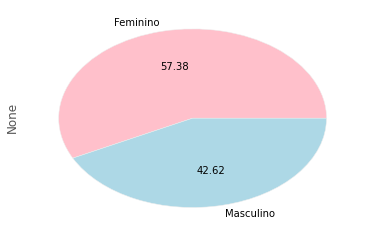

In [202]:
pd.DataFrame.plot(kind='pie', data=universitarios.V0302.value_counts(), colors=('pink', 'lightblue'), autopct="%0.2f",legend=False)

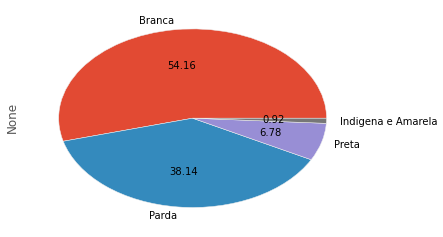

In [203]:
pd.DataFrame.plot(kind='pie', data=universitarios.V0404.value_counts(), autopct="%0.2f",legend=False)

In [204]:
universitarios.V6002 = universitarios.V6002.astype('category')
universitarios.V6002.cat.categories = ('Pública', 'Privada')

/Users/NicolasFonteyne/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


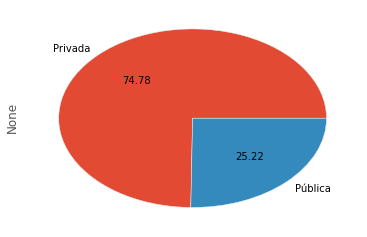

In [205]:
pd.DataFrame.plot(kind='pie', data=universitarios.V6002.value_counts(), autopct="%0.2f",legend=False)